In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv('heartfailure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


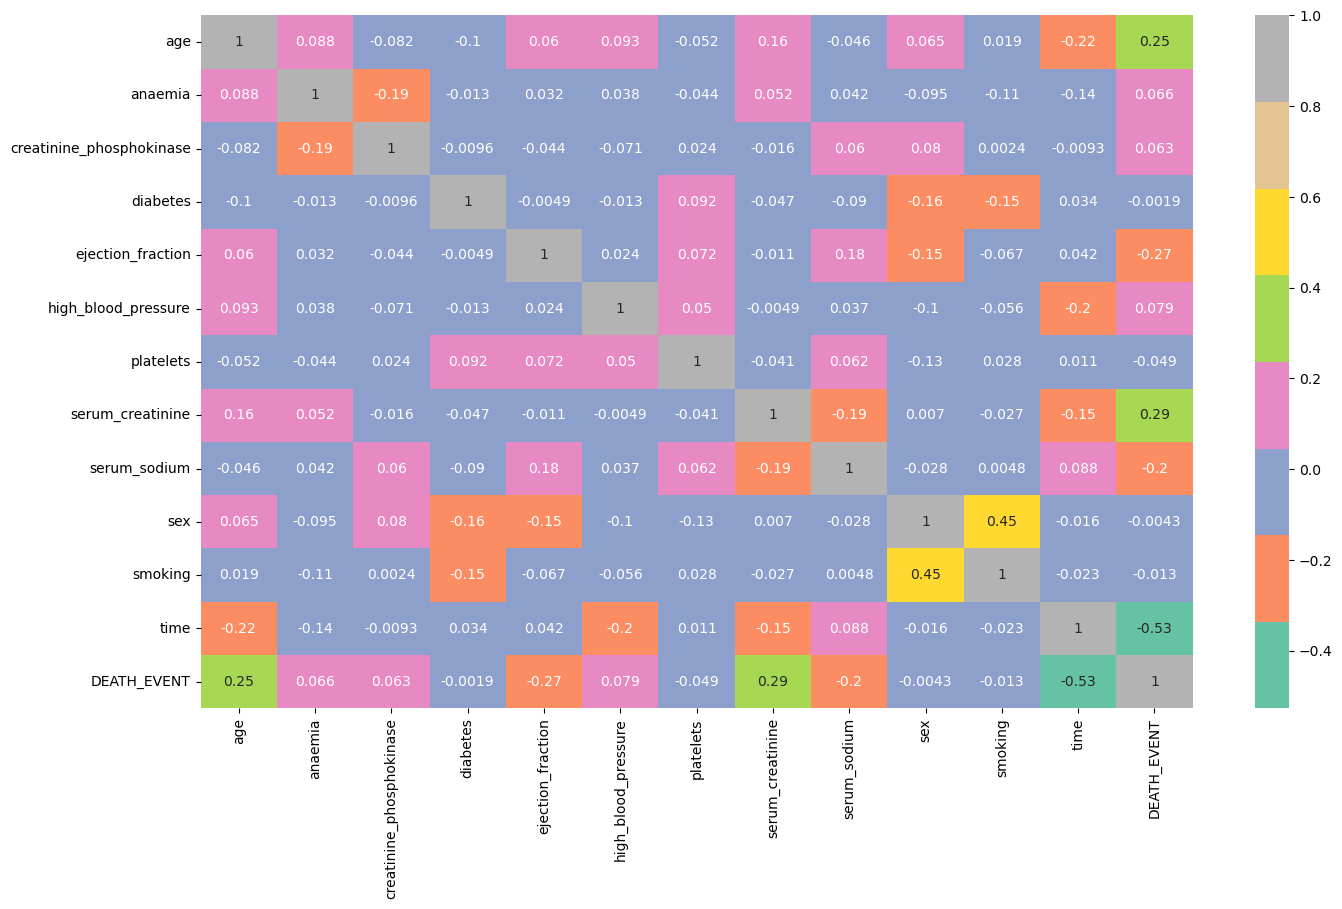

In [7]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [8]:
# training and normalization of data
X = data.iloc[:,:12]
Y = data.iloc[:,12:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [9]:
test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)



C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

In [10]:
print(train_accuracy)

[100.0, 77.824, 77.824, 71.13000000000001, 71.967, 69.45599999999999, 70.293, 69.038, 70.711, 69.87400000000001, 70.293, 67.364, 67.782, 68.201, 69.87400000000001, 67.782, 68.201, 65.69, 66.527, 66.109, 66.109, 66.109, 66.94600000000001, 66.109, 65.69, 65.69, 65.69, 64.854, 65.69, 65.69, 65.69, 65.69, 66.527, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69, 65.69]


In [11]:
print(test_accuracy)

[51.666999999999994, 68.333, 61.667, 70.0, 63.333, 66.667, 63.333, 68.333, 68.333, 68.333, 66.667, 71.667, 66.667, 73.333, 70.0, 73.333, 73.333, 75.0, 75.0, 75.0, 75.0, 75.0, 73.333, 75.0, 73.333, 76.667, 75.0, 76.667, 73.333, 76.667, 75.0, 75.0, 75.0, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667, 76.667]


In [12]:
print(test_mse_value)

[0.483, 0.317, 0.383, 0.3, 0.367, 0.333, 0.367, 0.317, 0.317, 0.317, 0.333, 0.283, 0.333, 0.267, 0.3, 0.267, 0.267, 0.25, 0.25, 0.25, 0.25, 0.25, 0.267, 0.25, 0.267, 0.233, 0.25, 0.233, 0.267, 0.233, 0.25, 0.25, 0.25, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233, 0.233]


In [13]:
print(train_mse_value)

[0.0, 0.222, 0.222, 0.289, 0.28, 0.305, 0.297, 0.31, 0.293, 0.301, 0.297, 0.326, 0.322, 0.318, 0.301, 0.322, 0.318, 0.343, 0.335, 0.339, 0.339, 0.339, 0.331, 0.339, 0.343, 0.343, 0.343, 0.351, 0.343, 0.343, 0.343, 0.343, 0.335, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343, 0.343]


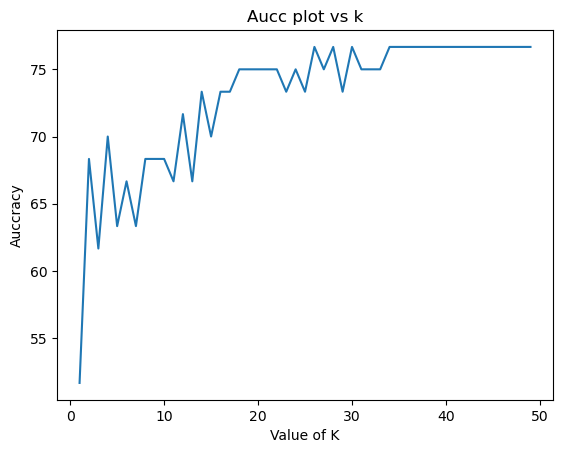

In [14]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
plt.plot(x,y)
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.show()

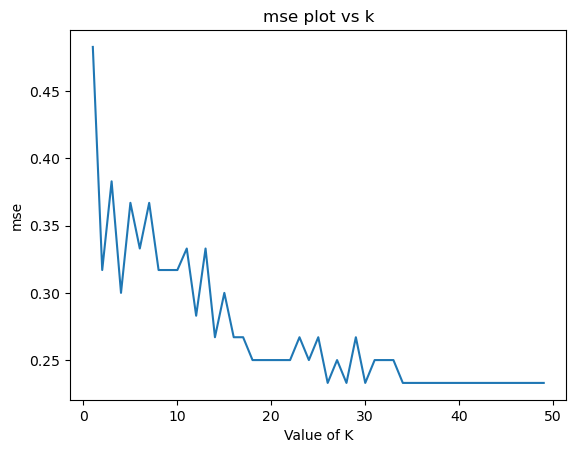

In [15]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y1 = test_mse_value
plt.plot(x,y1)
plt.title('mse plot vs k')
plt.xlabel('Value of K')
plt.ylabel('mse')
plt.show()

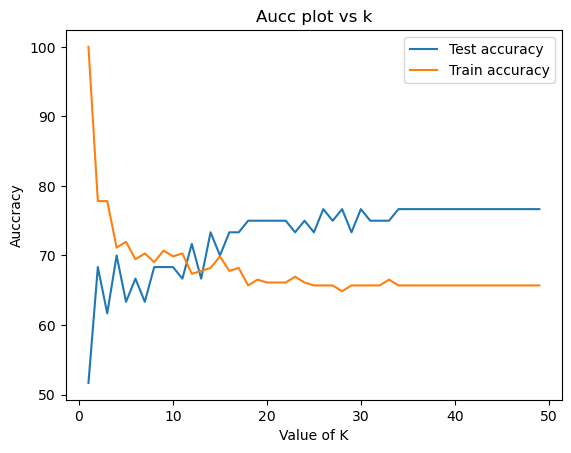

In [16]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')

plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

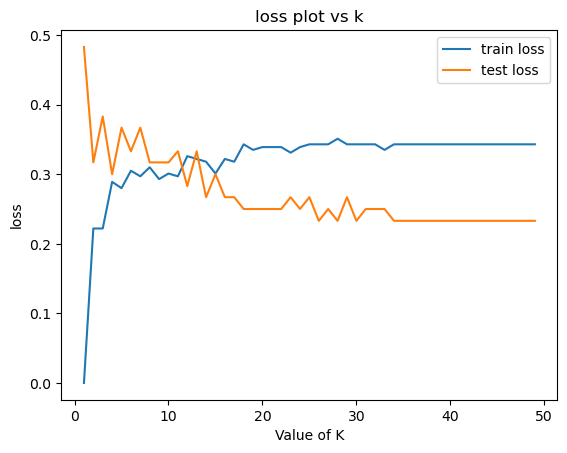

In [17]:
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
max_accuracy = np.argmax(np.array(train_mse_value[14:20])-np.array(test_mse_value[14:20])) +1
max_accuracy

4

In [19]:
max_accuracy = max(test_accuracy)
print("Max Accuracy:", max_accuracy)


Max Accuracy: 76.667


In [26]:
max_accuracy = max(test_accuracy)
max_accuracy_index = test_accuracy.index(max_accuracy)
corresponding_k = max_accuracy_index + 1  # Adding 1 because index starts from 0 but k starts from 1
print("Max Accuracy:", max_accuracy)
print("Corresponding K value when max accuracy is highest:", corresponding_k)


Max Accuracy: 76.667
Corresponding K value when max accuracy is highest: 26


In [20]:
print(train_accuracy[14:20])
print(test_accuracy[14:20])

[69.87400000000001, 67.782, 68.201, 65.69, 66.527, 66.109]
[70.0, 73.333, 73.333, 75.0, 75.0, 75.0]


In [27]:
KNN = KNeighborsClassifier(n_neighbors=26)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

76.667


C:\Users\SU3ARNA\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


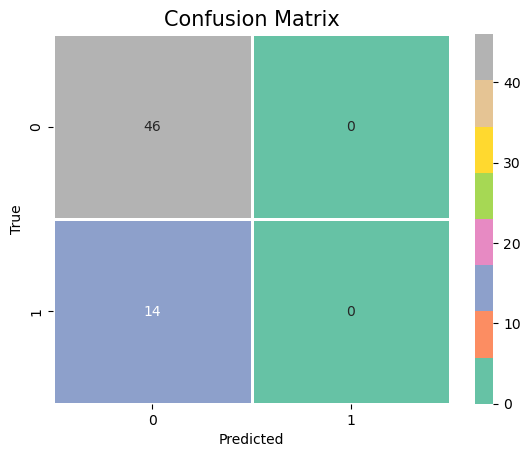

In [28]:

cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [23]:
d = X_test.iloc[0:1]
d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146


In [24]:
new_data = {'age':[50],'anaemia':[1],'creatinine_phosphokinase':[115],'diabetes':[0],'ejection_fraction':[20],'high_blood_pressure':[0],'platelets':[189000.0],'serum_creatinine':[0.8],'serum_sodium':[139],'sex':[1],'smoking':[0],'time':[146]}
d1 = pd.DataFrame(new_data)


In [25]:
Y_score = KNN.predict(d1)[0]
print(Y_score)

0


In [36]:
sample_data = data.iloc[173, :-1]
death_event = data.iloc[173, -1]


print("Sample data:", sample_data)
print("DEATH_EVENT for the sample data:", death_event)

Sample data: age                             50.0
anaemia                          1.0
creatinine_phosphokinase       115.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              0.0
platelets                   189000.0
serum_creatinine                 0.8
serum_sodium                   139.0
sex                              1.0
smoking                          0.0
time                           146.0
Name: 173, dtype: float64
DEATH_EVENT for the sample data: 0
